In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df = pd.read_csv("PlantGrowth.csv",
                 usecols=[0,1,2])
df.rename(columns = {'rownames':'plant'}, inplace = True)
display(df)

,plant,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl
5,6,4.61,ctrl
6,7,5.17,ctrl
7,8,4.53,ctrl
8,9,5.33,ctrl
9,10,5.14,ctrl


# **Explanatory Data Analysis (EDA)**
<p style="font-size:18px;">The following code displays the summary statistics calculated on the PlantGrowth dataset, and allows data visualization through a box plot.</p>

In [3]:
#Summary statistics
print(df.groupby('group')['weight'].describe())

       count   mean       std   min     25%    50%     75%   max
group                                                           
ctrl    10.0  5.032  0.583091  4.17  4.5500  5.155  5.2925  6.11
trt1    10.0  4.661  0.793676  3.59  4.2075  4.550  4.8700  6.03
trt2    10.0  5.526  0.442573  4.92  5.2675  5.435  5.7350  6.31


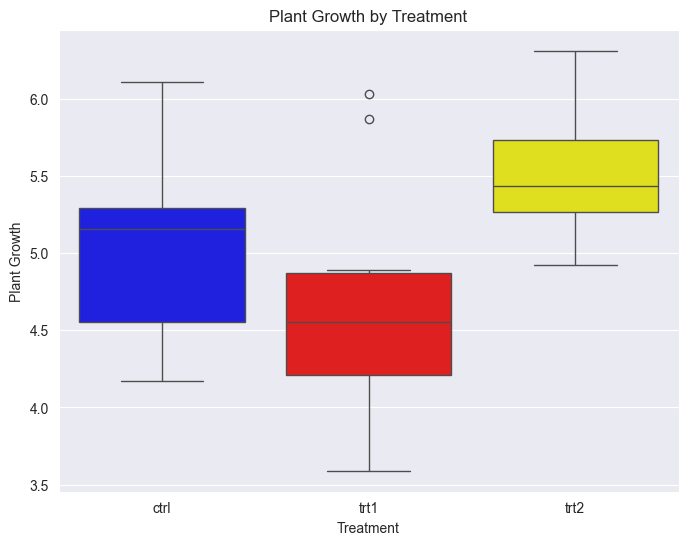

In [4]:
plt.figure(figsize=(8, 6))
palette = ['blue', 'red', 'yellow']
sns.boxplot(x='group', y='weight', data=df, hue = 'group', palette=palette)
plt.xlabel("Treatment")
plt.ylabel("Plant Growth")
plt.title("Plant Growth by Treatment")

plt.show()

# **Statistical Analysis**
<span style="font-size:18px;">ANOVA Analysis has been performed in order to evaluate the differences in plant growth under different experimental treatments.</span>

In [5]:
#ANOVA to analyze differences between treatments
anova_result = stats.f_oneway(df[df['group'] == 'ctrl']['weight'],
                               df[df['group'] == 'trt1']['weight'],
                               df[df['group'] == 'trt2']['weight'])
print("ANOVA p-value:", anova_result.pvalue)

ANOVA p-value: 0.015909958325622895


<span style="font-size:18px;">The p-value obtained indicates that there is strong evidence to reject the null hypothesis, meaning that there are statistically significant differences in plant growth among at least some of the treatment groups.</span>

<span style="font-size:18px;">Tukey Honest Significant Difference (HSD) test was employed to further understand the nature of these differences.</span>

In [6]:
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#Fit the linear model ('weight' is the dependent variable, and 'group' is the independent variable).
model = ols('weight ~ group', data=df).fit()

#Tukey's HSD test
tukey_results = pairwise_tukeyhsd(endog=df['weight'], groups=df['group'], alpha=0.05)

print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  ctrl   trt1   -0.371 0.3909 -1.0622 0.3202  False
  ctrl   trt2    0.494  0.198 -0.1972 1.1852  False
  trt1   trt2    0.865  0.012  0.1738 1.5562   True
---------------------------------------------------


# **Conclusion**
<span style="font-size:18px;">The results of the test show that there is no significant difference between the "ctrl" treatment and the other two. While there is a significant distinction in plant growth between these two groups. The positive mean difference of 0.865 indicates that, on average, the "trt2" group has higher plant weights compared to the "trt1" group.</span>
